In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from qiskit import QuantumRegister, QuantumCircuit
from qiskit import Aer
from qiskit.visualization import plot_state_city
import qiskit.quantum_info as qi

from qelvin import QRegister, QCircuit

## Quantum Fourier Transform

The quantum Fourier transform (QFT) on an orthonormal basis $|0\rangle,...,|N-1\rangle$ is defined to be a linear operator with the following action on the basis states,

$$
\begin{equation}
|j\rangle\rightarrow\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{\frac{2\pi ijk}{N}}|k\rangle.
\end{equation}
$$

QFT of state $|\Psi\rangle=|000\rangle$ is computed below.

State before QFT:
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


/home/dan/Projects/QSim/qelvin/.env/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


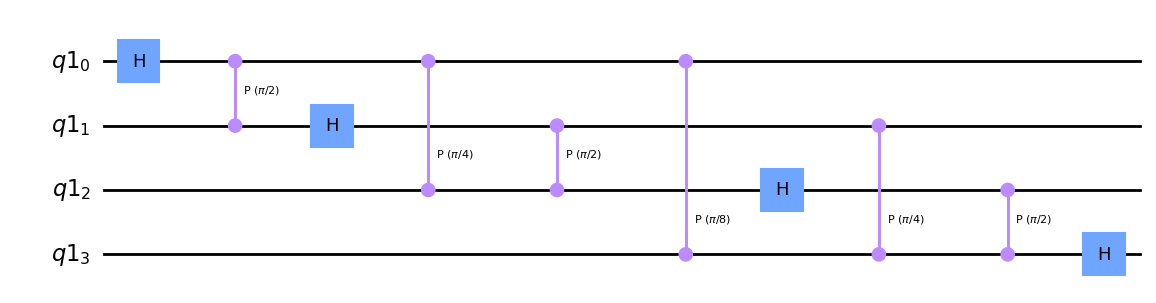

State after QFT:
Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


In [2]:
backend = Aer.get_backend('statevector_simulator')

N = 4

q = QuantumRegister(N)
circ = QuantumCircuit(q)

print("State before QFT:")
print(qi.Statevector.from_instruction(circ))

for j in range(N):
    for k in range(j):
        circ.cp(np.pi/float(2**(j-k)), q[j], q[k])
    circ.h(q[j])

display(circ.draw('mpl'))

job = backend.run(circ)

result = job.result()

outputstate_qiskit = result.get_statevector(circ, decimals=3)

print("State after QFT:")
print(outputstate_qiskit)


#### QFT with `qelvin`

QFT of state $|\Psi\rangle=|000\rangle$ module is computed below using `qelvin`.

In [3]:
psi_qelvin = QRegister(N)
circ_qelvin = QCircuit(psi_qelvin)

print("State before QFT:")
print(circ_qelvin.state())

for j in range(N):
    for k in range (j):
        circ_qelvin.cp(np.pi/float(2**(j-k)), j, k)
    circ_qelvin.h(j)

print(circ_qelvin)

circ_qelvin.run()

outputstate_qelvin = circ_qelvin.state()

print("State after QFT:")
print(outputstate_qelvin)

State before QFT:
[ 1.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j ]
      -------  -------           -------                    -------                             
     |       ||       |         |       |                  |       |                            
q0---|   H   ||P(1.57)|---------|P(0.79)|------------------|P(0.39)|-------------------------------
     |       ||       |         |       |                  |       |                            
      -------  -------           -------                    -------                             
                  |     -------     |     -------              |     -------                    
                  |    |       |    |    |       |             |    |       |                   
q1----------------o----|   H   |----|----|P(1.57)|-------